<a href="https://colab.research.google.com/github/ritam-sarkar/ml-practice/blob/main/Autoencoder__gray_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0   # Normalize to [0,1]
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


In [4]:
input_img = Input(shape=(28*28,))

# Encoder
encoded = Dense(64, activation='relu')(input_img)  # latent space (64-dim)

# Decoder
decoded = Dense(28*28, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

In [5]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# 5️⃣ Encode & Decode some test images
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Decoder model to reconstruct from latent space
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0951 - val_loss: 0.0328
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0295 - val_loss: 0.0212
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0199 - val_loss: 0.0154
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0147 - val_loss: 0.0117
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0113 - val_loss: 0.0093
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0055 - val_loss: 0.0050
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
print(x_train.shape)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(60000, 784)
(10000, 64)
(10000, 784)


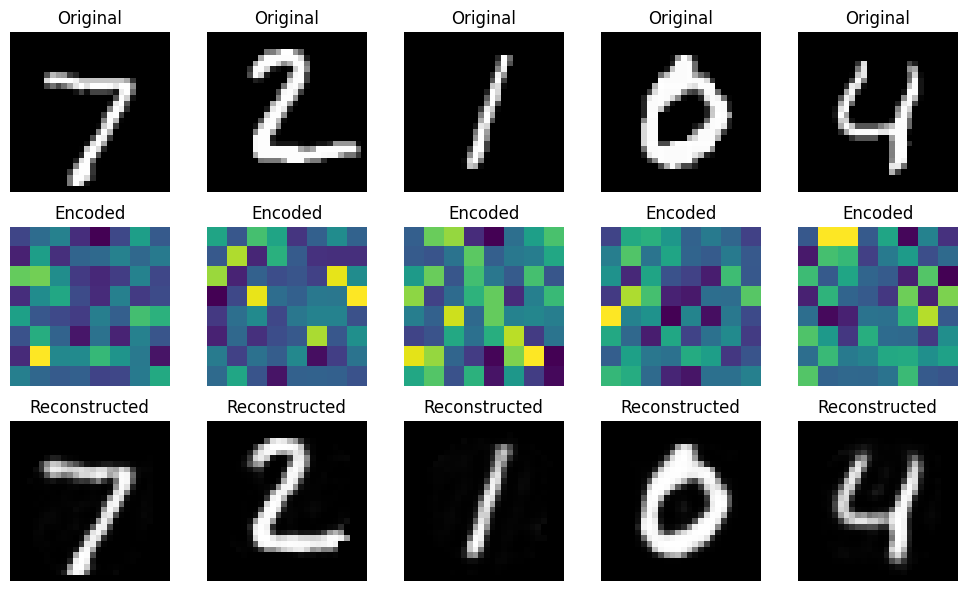

In [25]:
n = 5
plt.figure(figsize=(10,6))
for i in range(n):
    # 1️⃣ Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # 2️⃣ Encoded (latent) — visualize as heatmap
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8), cmap='viridis')  # reshape 64 → 8x8
    plt.title("Encoded")
    plt.axis('off')

    # 3️⃣ Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()